In [19]:
!nvidia-smi

Sun Mar 19 22:44:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:04:00.0 Off |                  N/A |
|  0%   24C    P8     9W / 250W |    648MiB / 11264MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:05:00.0 Off |                  N/A |
|  0%   

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import configs
import os
from deer.agent import NeuralAgent
from deer.learning_algos.CRAR_torch import CRAR  
import deer.controllers as bc 
import yaml
from deer.policies import EpsilonGreedyPolicy, FixedFigure8Policy     

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Alternating T Maze

In [2]:
from deer.environments.Figure8 import MyEnv as Env 

In [22]:
fname = 'altT_mb'

In [23]:
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/'

In [24]:
with open(f'{engram_dir}params/{fname}.yaml', 'r') as f:
    parameters = yaml.safe_load(f)

In [53]:
parameters['fname'] = 'altT_dm_dim10/altT_mb_4'
parameters['internal_dim'] = 10

In [54]:
policy_eps=0.5

In [55]:
env = Env(                                                                     
    give_rewards=parameters['figure8_give_rewards'],                           
    higher_dim_obs=parameters['higher_dim_obs'],                               
    show_rewards=parameters['show_rewards'], plotfig=False                     
    ) 

In [56]:
rng = np.random.RandomState()
learning_algo = CRAR(                                                          
    env, parameters['freeze_interval'], parameters['batch_size'], rng,         
    internal_dim=parameters['internal_dim'], lr=parameters['learning_rate'],
    nn_yaml=parameters['nn_yaml'], yaml_mods=parameters['yaml_mods'],          
    double_Q=True, loss_weights=parameters['loss_weights'],                    
    encoder_type=parameters['encoder_type'], mem_len=parameters['mem_len'],
    train_len=parameters['train_len']  
    )   

In [57]:
train_policy = EpsilonGreedyPolicy(                                     
    learning_algo, env.nActions(), rng, epsilon=policy_eps)             
test_policy = EpsilonGreedyPolicy(                                      
    learning_algo, env.nActions(), rng, 0.)  

In [58]:
agent = NeuralAgent(                                                        
    env, learning_algo, parameters['replay_memory_size'], 1,                
    parameters['batch_size'], rng, save_dir=engram_dir,                     
    train_policy=train_policy, test_policy=test_policy)
agent.attach(bc.LearningRateController(                                     
    initial_learning_rate=parameters['learning_rate'],                      
    learning_rate_decay=parameters['learning_rate_decay'],                  
    periodicity=1))                                                         
agent.attach(bc.TrainerController(                                          
    evaluate_on='action',  periodicity=parameters['update_frequency'],      
    show_episode_avg_V_value=True, show_avg_Bellman_residual=True))         
best_controller = bc.FindBestController(                                    
    validationID=Env.VALIDATION_MODE, testID=None, unique_fname=fname)      
agent.attach(best_controller)                                               
agent.attach(bc.InterleavedTestEpochController(                             
    id=Env.VALIDATION_MODE, epoch_length=parameters['steps_per_test'],      
    periodicity=1, show_score=True, summarize_every=10, unique_fname=fname))

In [59]:
parameters

{'batch_size': 64,
 'deterministic': False,
 'discount': 0.9,
 'encoder_type': 'regular',
 'epochs': 31,
 'epsilon_decay': 1000,
 'epsilon_min': 1.0,
 'epsilon_start': 1.0,
 'figure8_give_rewards': True,
 'fname': 'altT_dm_dim10/altT_mb_4',
 'frame_skip': 2,
 'freeze_interval': 1000,
 'higher_dim_obs': True,
 'internal_dim': 10,
 'learning_rate': 0.0001,
 'learning_rate_decay': 1.0,
 'loss_weights': [0.01, 0.1, 0.1, 1, 0],
 'mem_len': 3,
 'nn_yaml': 'dm',
 'replay_memory_size': 100000,
 'show_rewards': False,
 'steps_per_epoch': 2000,
 'steps_per_test': 1000,
 'train_len': 10,
 'update_frequency': 1,
 'yaml_mods': {}}

In [60]:
parameters['fname']

'altT_dm_dim10/altT_mb_4'

In [61]:
agent.setNetwork(parameters['fname'] + '/fname', nEpoch=31)

In [62]:
agent._in_episode = True
agent._mode = 0 # Testing mode with plan_depth=0
initState = env.reset(agent._mode)
inputDims = env.inputDimensions()
for i in range(len(inputDims)):
    if inputDims[i][0] > 1:
        agent._state[i][1:] = initState[i][1:]
agent._Vs_on_last_episode = []
is_terminal = False
reward = 0

In [63]:
agent._state.shape

(1, 7, 6)

In [64]:
import torch

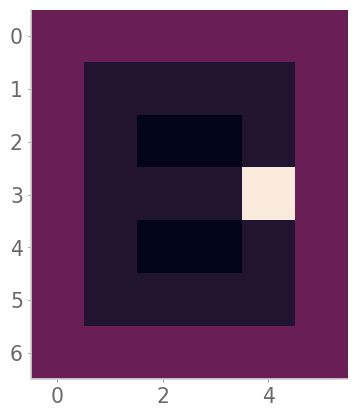

=====-===========


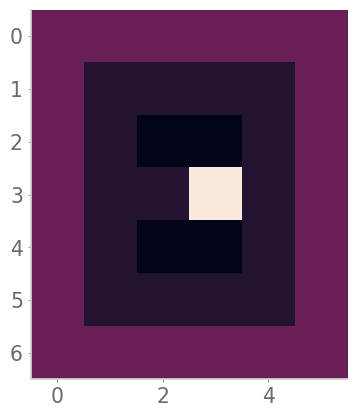

=====-===========


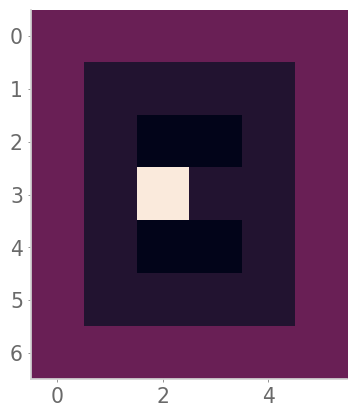

=====-===========


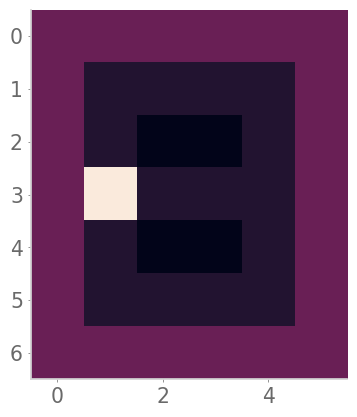

=====-===========


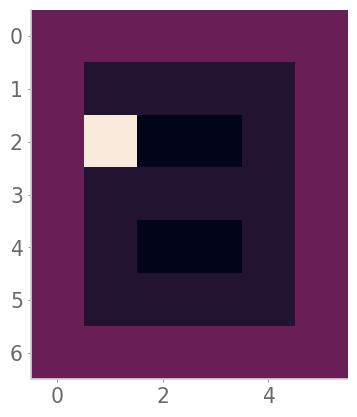

=====-===========


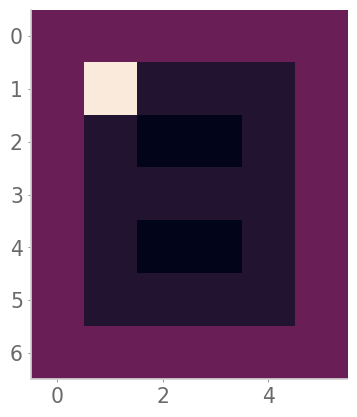

=====-===========


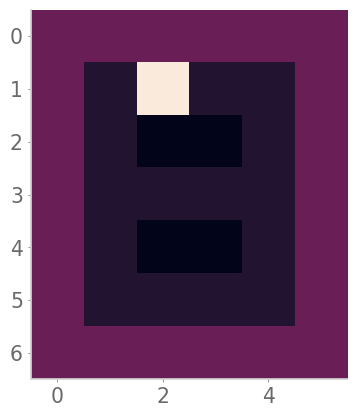

=====-===========


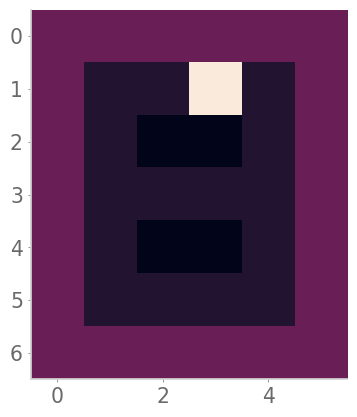

=====-===========


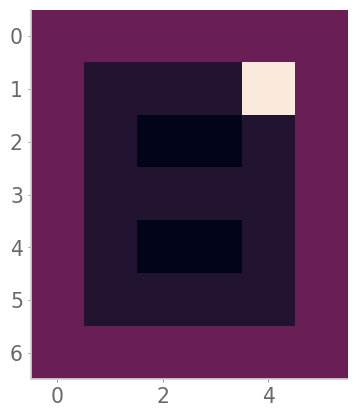

=====-===========


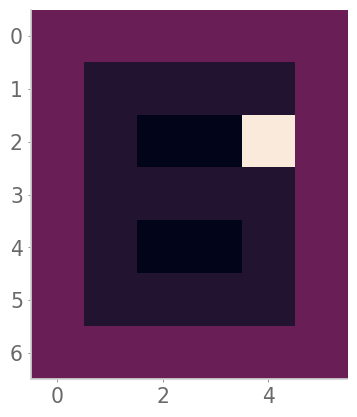

=====-===========


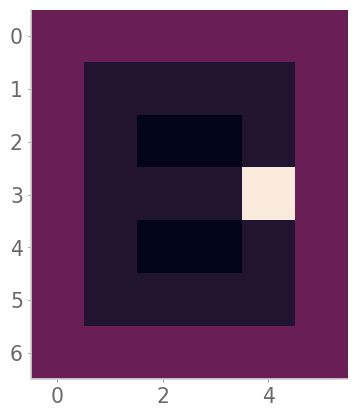

=====-===========


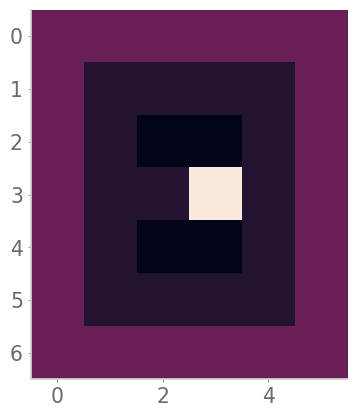

=====-===========


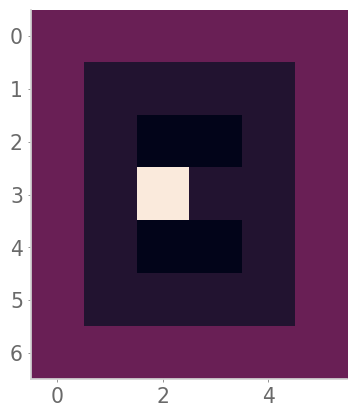

=====-===========


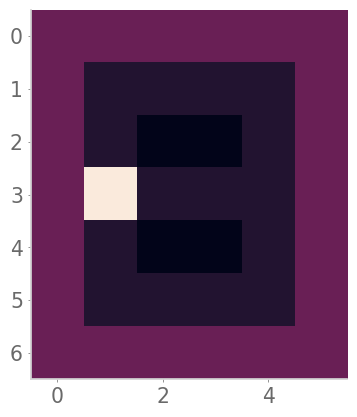

=====-===========


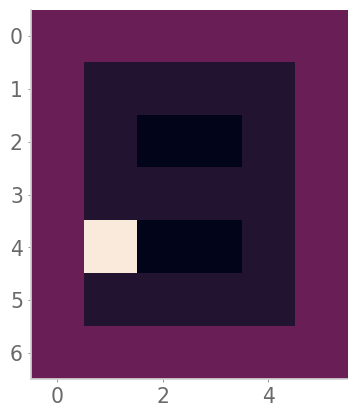

=====-===========


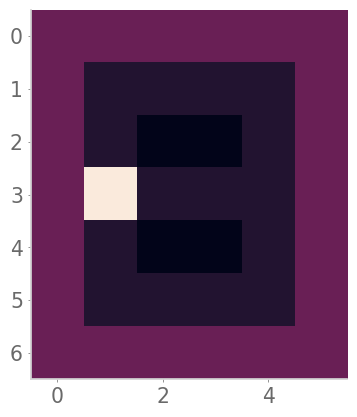

=====-===========


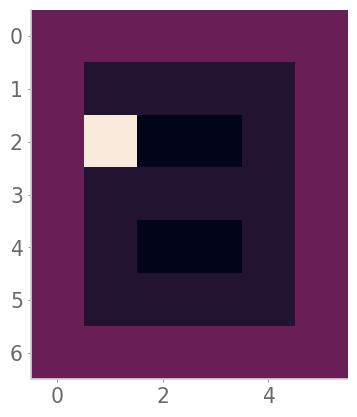

=====-===========


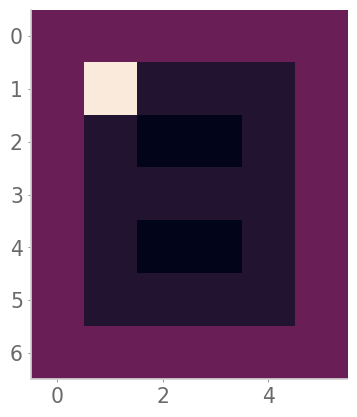

=====-===========


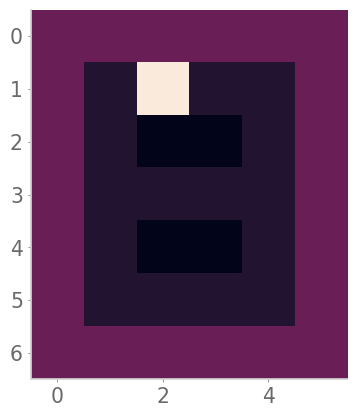

=====-===========


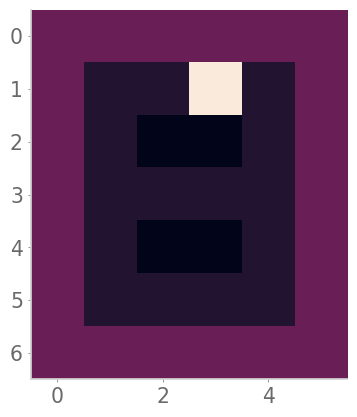

=====-===========


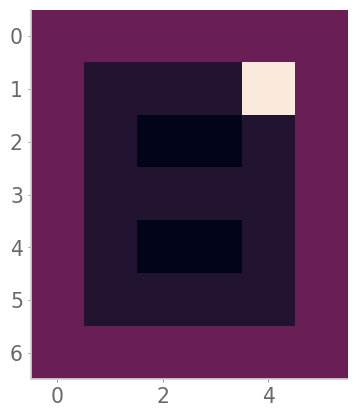

=====-===========


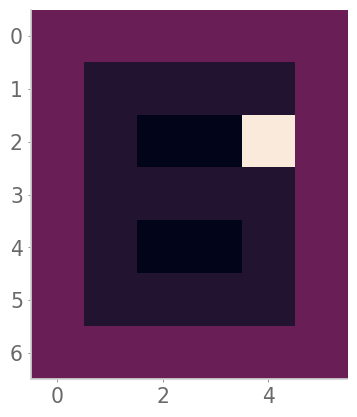

=====-===========


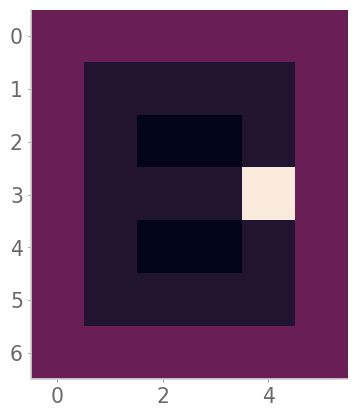

=====-===========


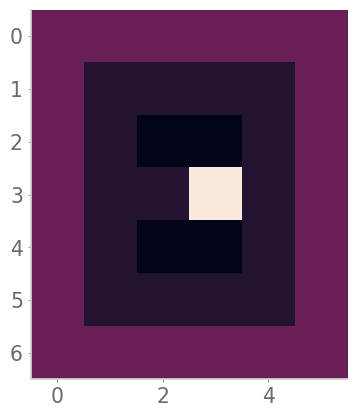

=====-===========


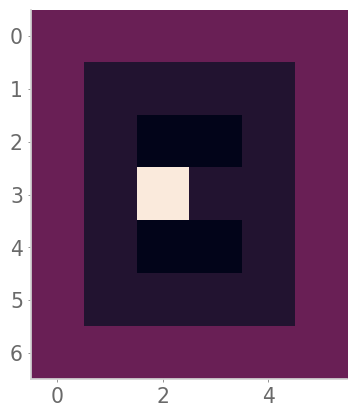

=====-===========


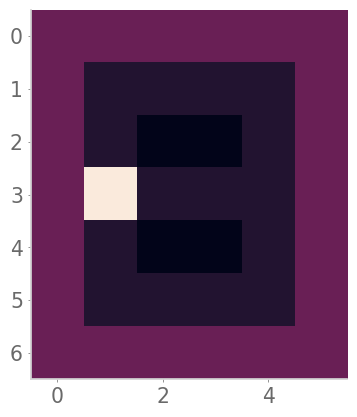

=====-===========


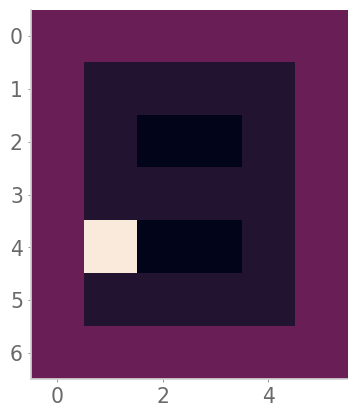

=====-===========


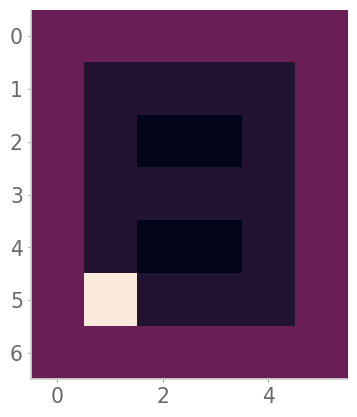

=====-===========


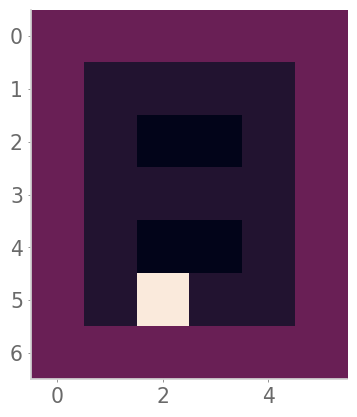

=====-===========


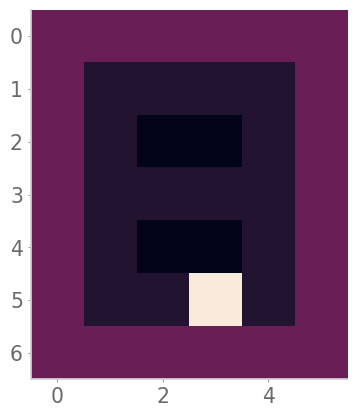

=====-===========


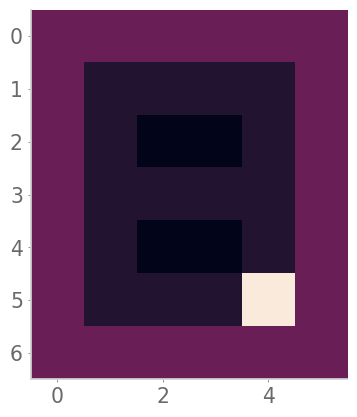

=====-===========


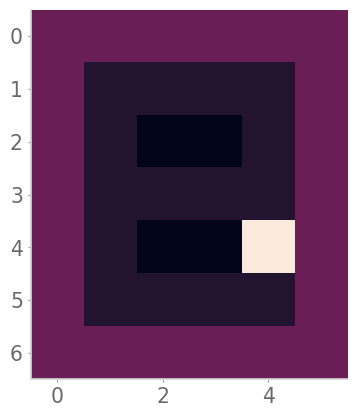

=====-===========


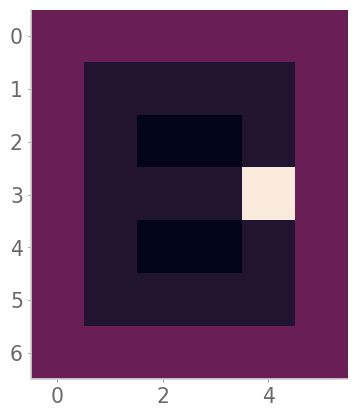

=====-===========


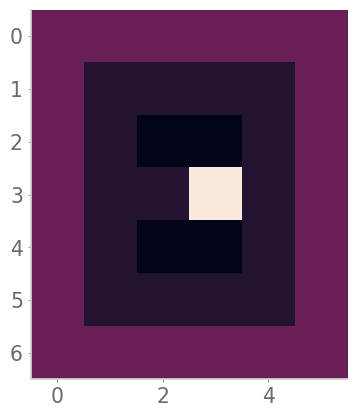

=====-===========


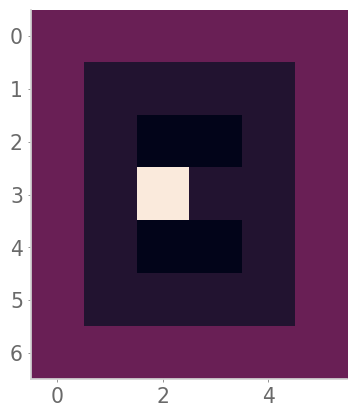

=====-===========


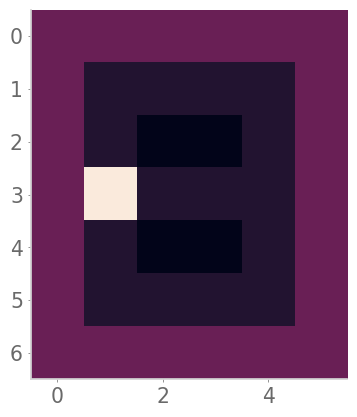

=====-===========


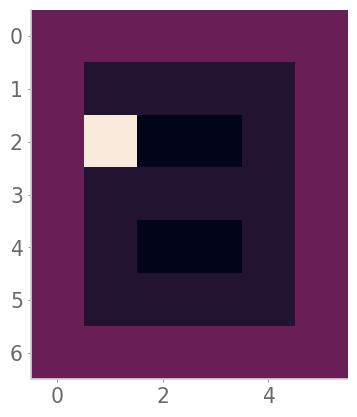

=====-===========


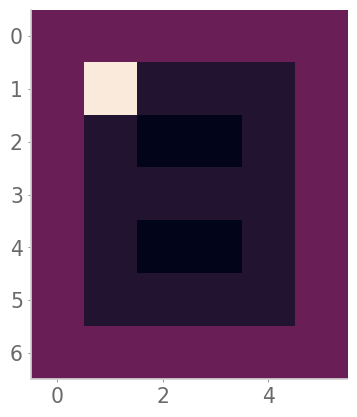

=====-===========


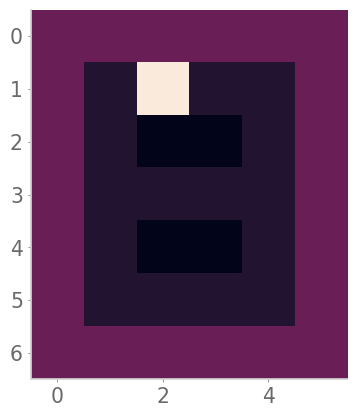

=====-===========


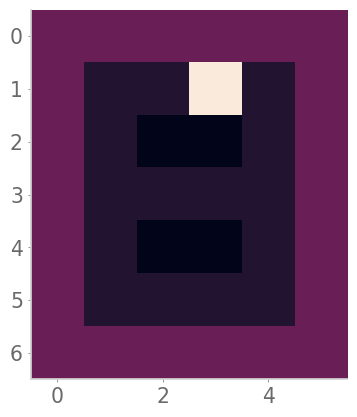

=====-===========


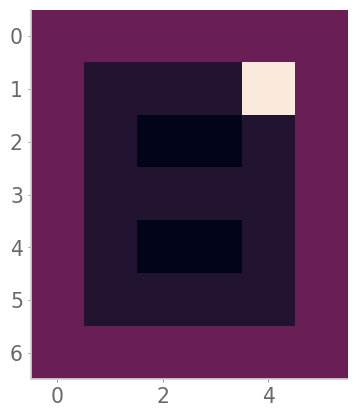

=====-===========


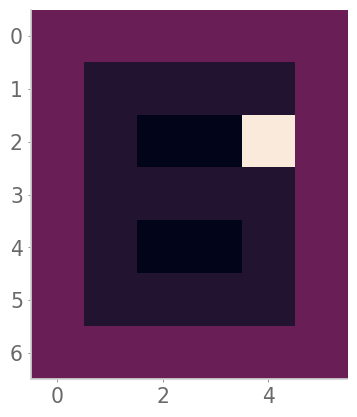

=====-===========


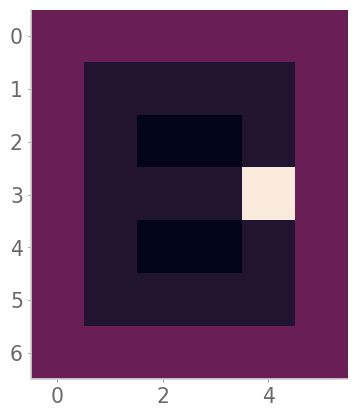

=====-===========


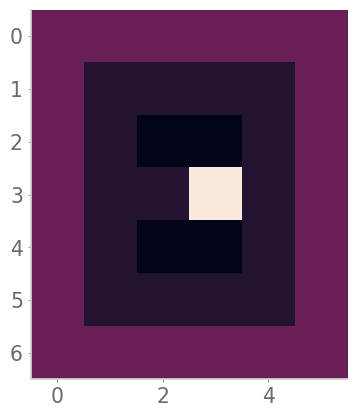

=====-===========


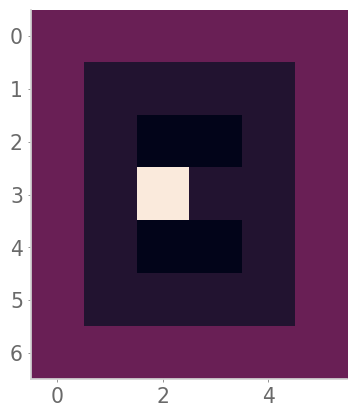

=====-===========


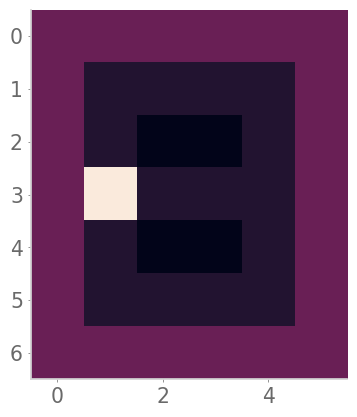

=====-===========


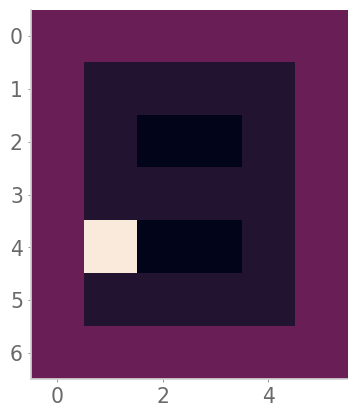

=====-===========


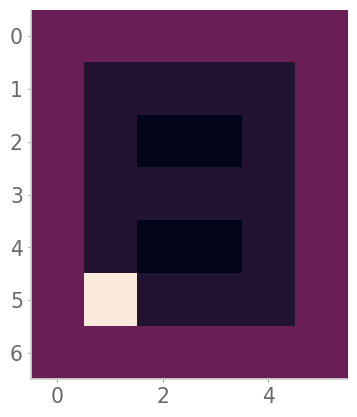

=====-===========


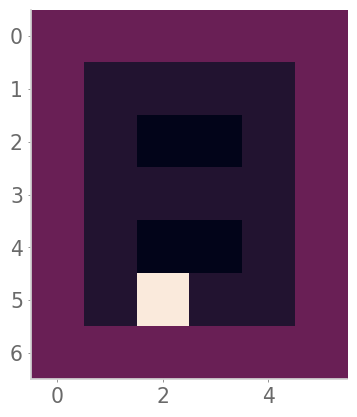

=====-===========


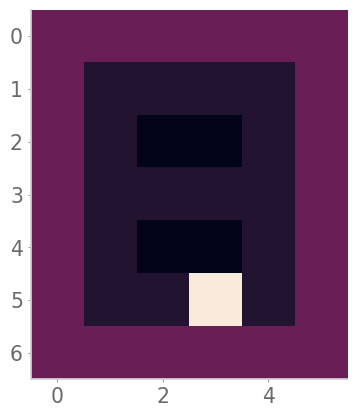

=====-===========


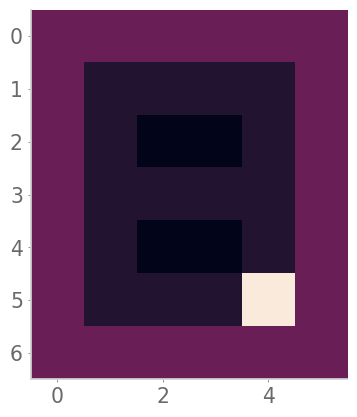

=====-===========


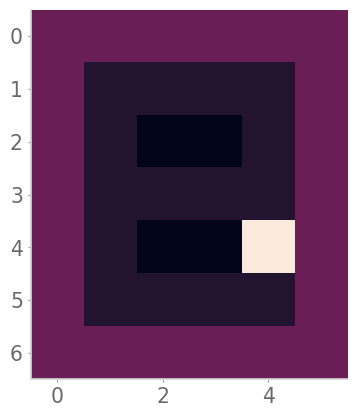

=====-===========


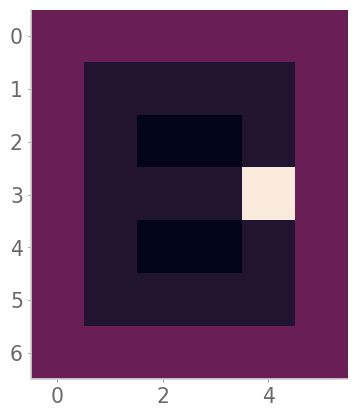

=====-===========


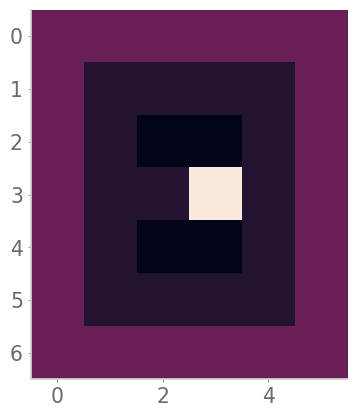

=====-===========


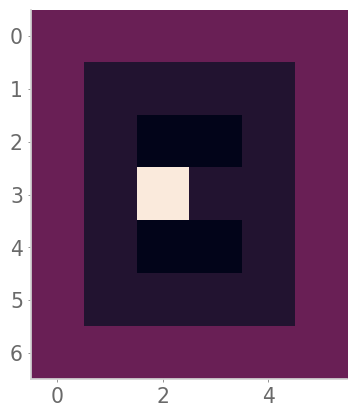

=====-===========


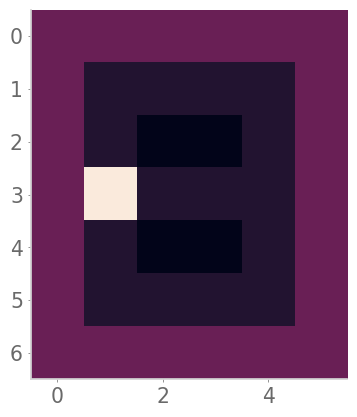

=====-===========


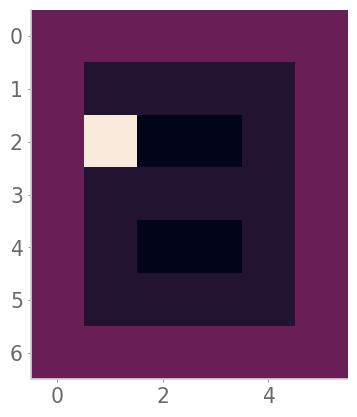

=====-===========


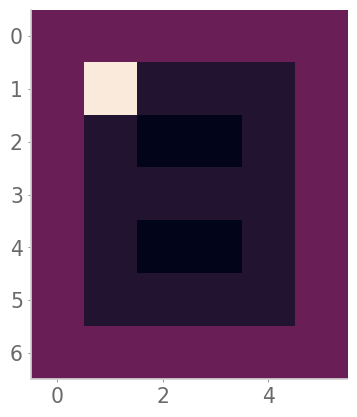

=====-===========


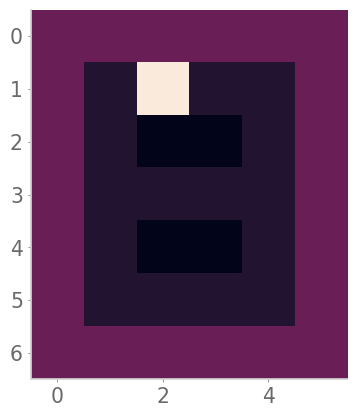

=====-===========


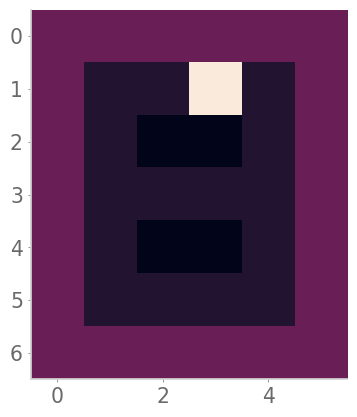

=====-===========


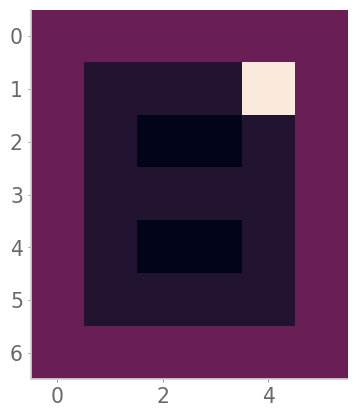

=====-===========


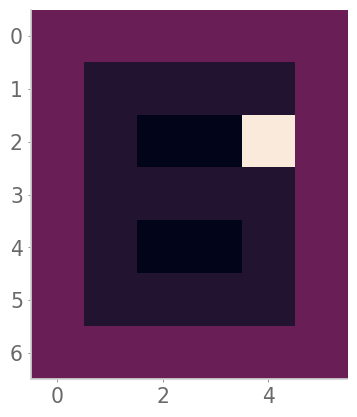

=====-===========


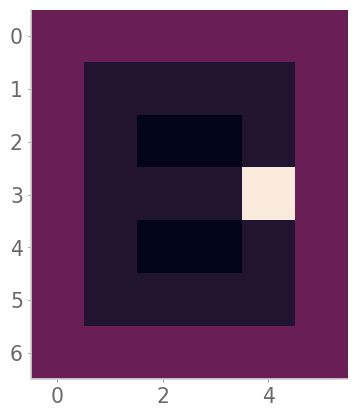

=====-===========


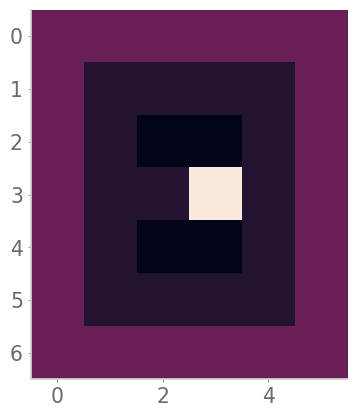

=====-===========


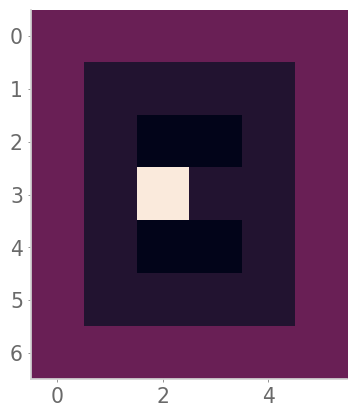

=====-===========


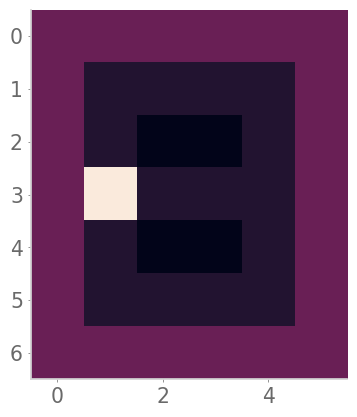

=====-===========


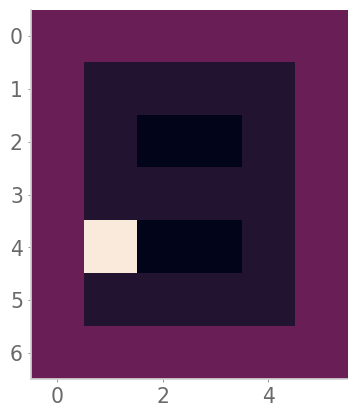

=====-===========


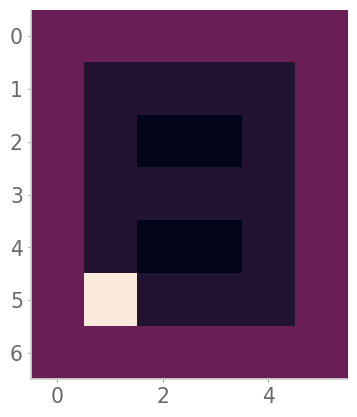

=====-===========


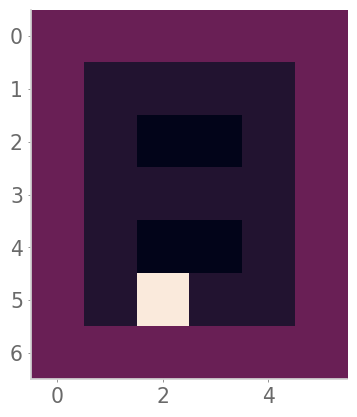

=====-===========


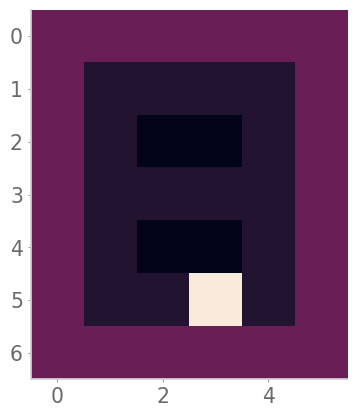

=====-===========


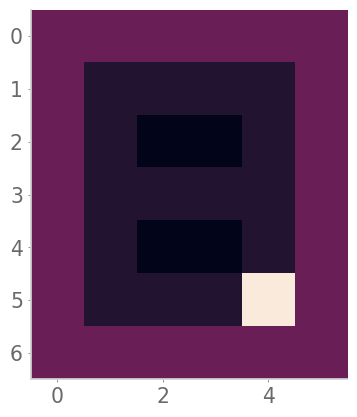

=====-===========


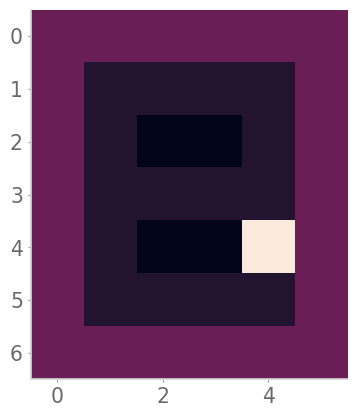

=====-===========


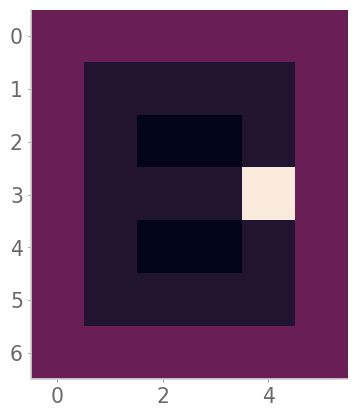

=====-===========


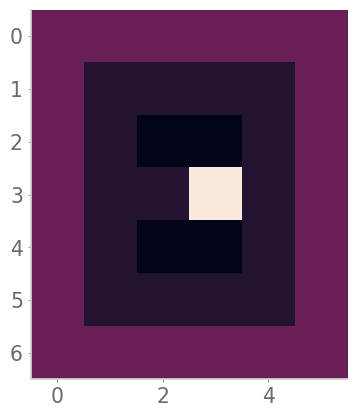

=====-===========


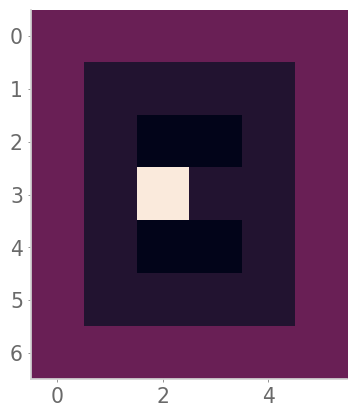

=====-===========


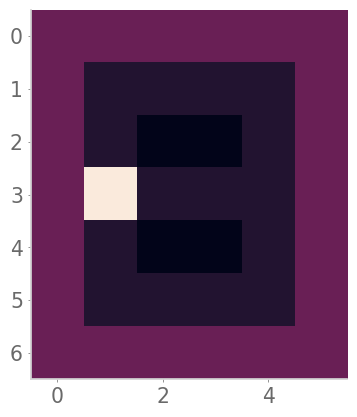

=====-===========


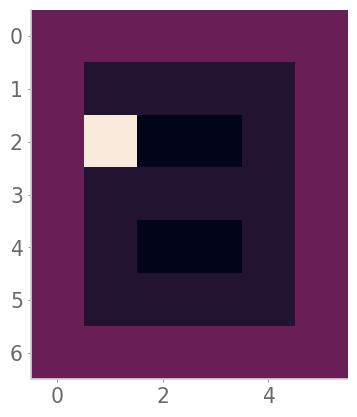

=====-===========


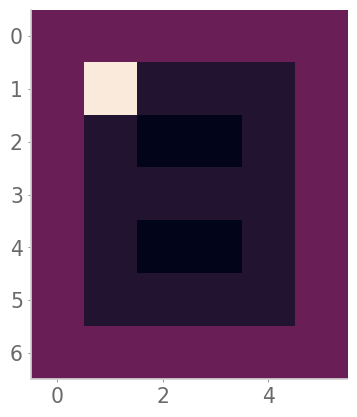

=====-===========


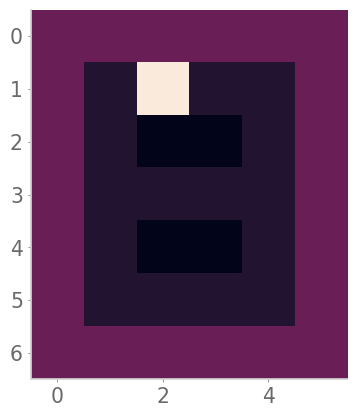

=====-===========


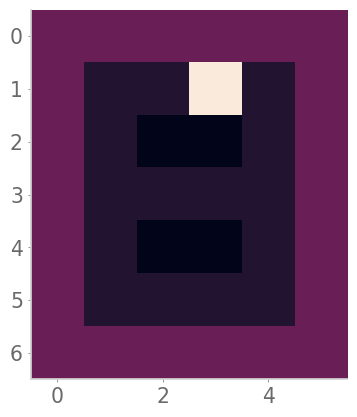

=====-===========


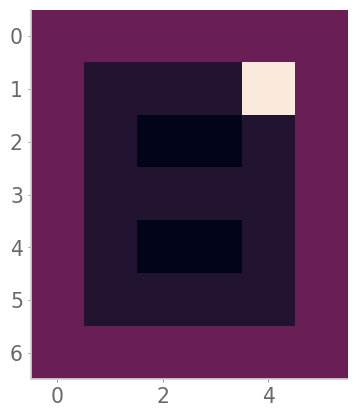

=====-===========


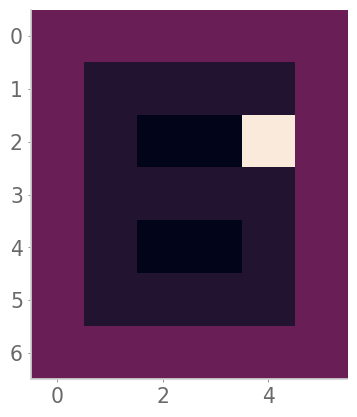

=====-===========


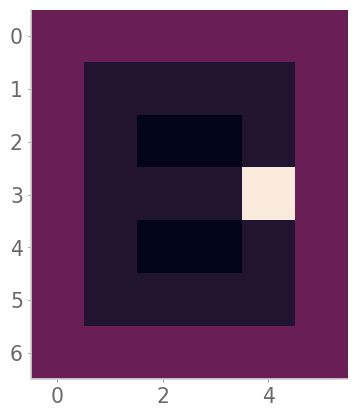

=====-===========


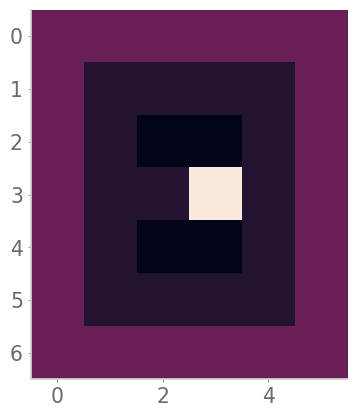

=====-===========


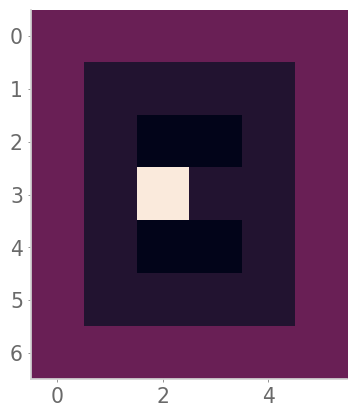

=====-===========


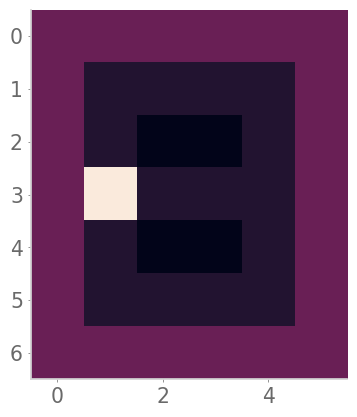

=====-===========


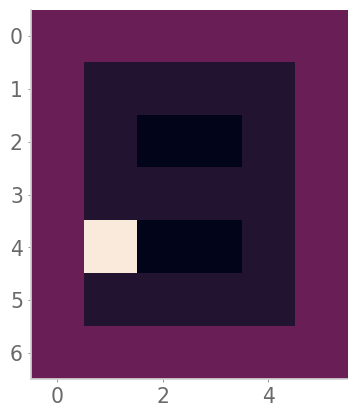

=====-===========


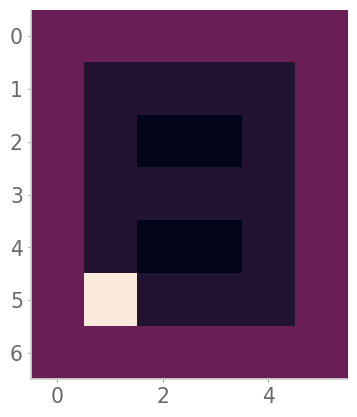

=====-===========


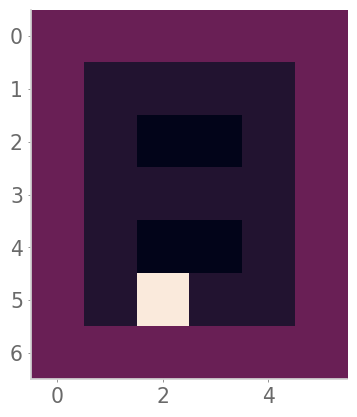

=====-===========


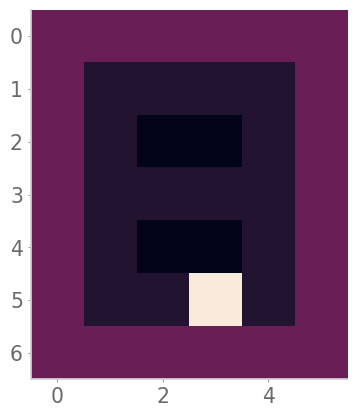

=====-===========


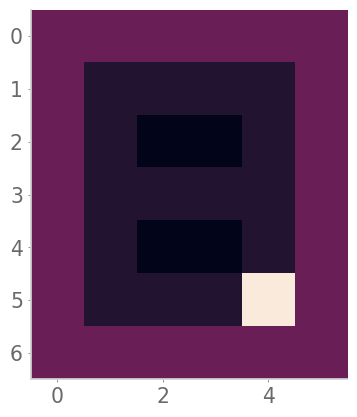

=====-===========


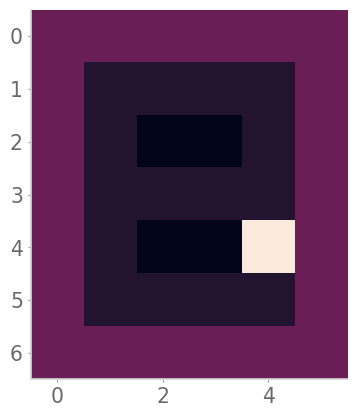

=====-===========


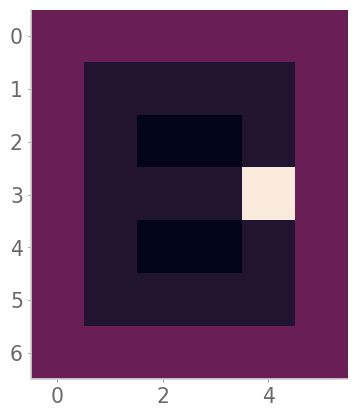

=====-===========


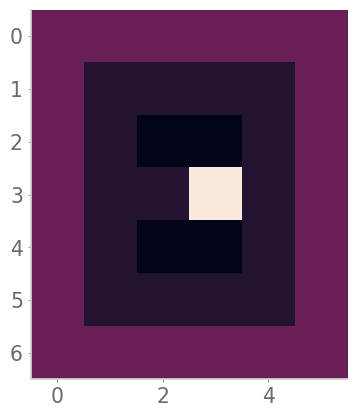

=====-===========


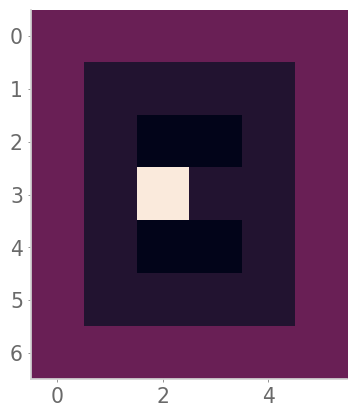

=====-===========


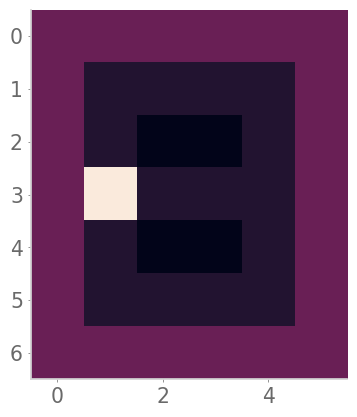

=====-===========


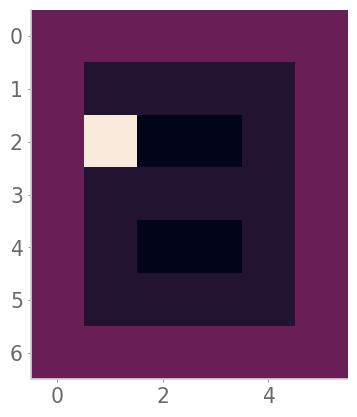

=====-===========


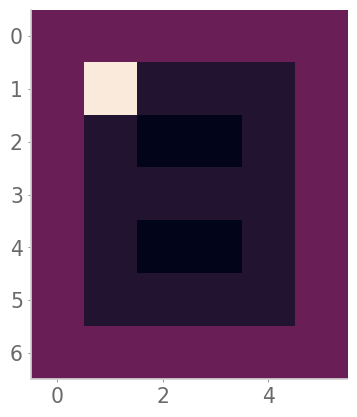

=====-===========


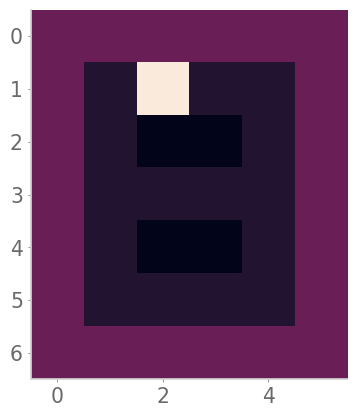

=====-===========


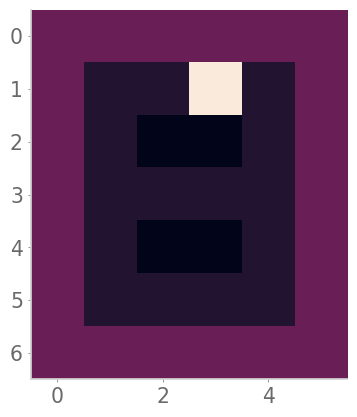

=====-===========


In [65]:
%matplotlib inline

for i in range(100):
    obs = env.observe()
    plt.figure()
    plt.imshow(np.flip(obs[0].squeeze()))
    plt.show()
    for i in range(len(obs)):
        agent._state[i] = obs[i]    

        state = torch.as_tensor(agent._state, device='cuda').float()
        zs = torch.as_tensor(agent._latent, device='cuda').float()
        latent = agent._learning_algo.crar.encoder(state, zs=zs)
        latent = latent.detach().cpu().numpy()
        agent._latent[0, 0:-1] = agent._latent[0, 1:]
        agent._latent[0, -1] = latent

    V, action, reward = agent._step()
    print('=====-===========')
    agent._Vs_on_last_episode.append(V)
    is_terminal = env.inTerminalState()
    if is_terminal: break

# Foraging

In [3]:
from deer.environments.Foraging import MyEnv as Env 

In [4]:
fname = 'foragingM1_mf'

In [5]:
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/'

In [6]:
with open(f'{engram_dir}params/{fname}.yaml', 'r') as f:
    parameters = yaml.safe_load(f)

In [90]:
parameters['fname'] = 'foraging5x5_dm_dim32/foraging5x5_mf_0'
parameters['internal_dim'] = 32
parameters['nn_yaml'] = 'dm'

In [91]:
policy_eps=0.5

In [10]:
env = Env(                                                                     
    rng=np.random.RandomState(),
    give_rewards=parameters['foraging_give_rewards'],                           
    higher_dim_obs=parameters['higher_dim_obs'],                               
    size_maze=parameters['size_maze'], plotfig=False                     
    ) 

In [93]:
learning_algo = CRAR(                                                          
    env, parameters['freeze_interval'], parameters['batch_size'], rng,         
    internal_dim=parameters['internal_dim'], lr=parameters['learning_rate'],
    nn_yaml=parameters['nn_yaml'], yaml_mods=parameters['yaml_mods'],          
    double_Q=True, loss_weights=parameters['loss_weights'],                    
    encoder_type=parameters['encoder_type'],
    )   

In [94]:
train_policy = EpsilonGreedyPolicy(                                     
    learning_algo, env.nActions(), rng, epsilon=policy_eps)             
test_policy = EpsilonGreedyPolicy(                                      
    learning_algo, env.nActions(), rng, 0.)  

In [95]:
agent = NeuralAgent(                                                        
    env, learning_algo, parameters['replay_memory_size'], 1,                
    parameters['batch_size'], rng, save_dir=engram_dir,                     
    train_policy=train_policy, test_policy=test_policy)
agent.attach(bc.LearningRateController(                                     
    initial_learning_rate=parameters['learning_rate'],                      
    learning_rate_decay=parameters['learning_rate_decay'],                  
    periodicity=1))                                                         
agent.attach(bc.TrainerController(                                          
    evaluate_on='action',  periodicity=parameters['update_frequency'],      
    show_episode_avg_V_value=True, show_avg_Bellman_residual=True))         
best_controller = bc.FindBestController(                                    
    validationID=Env.VALIDATION_MODE, testID=None, unique_fname=fname)      
agent.attach(best_controller)                                               
agent.attach(bc.InterleavedTestEpochController(                             
    id=Env.VALIDATION_MODE, epoch_length=parameters['steps_per_test'],      
    periodicity=1, show_score=True, summarize_every=10, unique_fname=fname))

In [61]:
agent.setNetwork(parameters['fname'] + '/fname', nEpoch=31)

In [96]:
agent._in_episode = True
agent._mode = 0 # Testing mode with plan_depth=0
initState = env.reset(agent._mode)
inputDims = env.inputDimensions()
for i in range(len(inputDims)):
    if inputDims[i][0] > 1:
        agent._state[i][1:] = initState[i][1:]
agent._Vs_on_last_episode = []
is_terminal = False
reward = 0

In [97]:
agent._state.shape

(1, 5, 5)

In [98]:
import torch

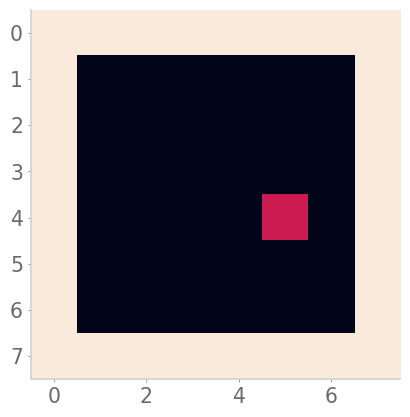

NameError: name 'agent' is not defined

In [11]:
%matplotlib inline

for i in range(100):
    obs = env.observe()
    plt.figure()
    plt.imshow(np.flip(obs[0].squeeze()))
    plt.show()
    for i in range(len(obs)):
        agent._state[i] = obs[i]    

        state = torch.as_tensor(agent._state, device='cuda').float()
        zs = torch.as_tensor(agent._latent, device='cuda').float()
        latent = agent._learning_algo.crar.encoder(state, zs=zs)
        latent = latent.detach().cpu().numpy()
        agent._latent[0, 0:-1] = agent._latent[0, 1:]
        agent._latent[0, -1] = latent

    V, action, reward = agent._step()
    print('=====-===========')
    agent._Vs_on_last_episode.append(V)
    is_terminal = env.inTerminalState()
    if is_terminal: break